In [5]:
# 모듈 로딩
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import csv
import matplotlib.pyplot as plt
import platform
import numpy as np
import requests
import time
import seaborn as sns
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import requests
import time
import re
from selenium import webdriver
from selenium.webdriver.common.by import By
from IPython import display

C:\Users\Heochaebeom\AppData\Local\Temp\ipykernel_12600\3796625947.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path)


{'여행': 10567, '유럽': 9784, '이탈리아': 1276, '추천': 906, '후기': 890, '준비물': 888, '준비': 806, '파리': 581, '혼자': 573, '달': 446, '예약': 446, '리스트': 437, '로마': 409, '프랑스': 379, '여자': 371, '스위스': 364, '일정': 361, '런던': 354, '스페인': 336, '유심': 324, '입국': 319, '꿀팁': 301, '정리': 286, '할인': 282, '프라하': 277, '포르투갈': 274, '루트': 263, '날씨': 249, '정보': 241, '피렌체': 233, '경비': 227, '체코': 223, '별': 221, '전': 221, '독일': 219, '박': 216, '해외여행': 215, '시작': 212, '여름': 209, '영국': 203, '아이': 202, '및': 202, '서유럽': 200, '편': 198, '중': 195, '코로나': 193, '카드': 191, '미술관': 183, '오스트리아': 182, '베네치아': 175}


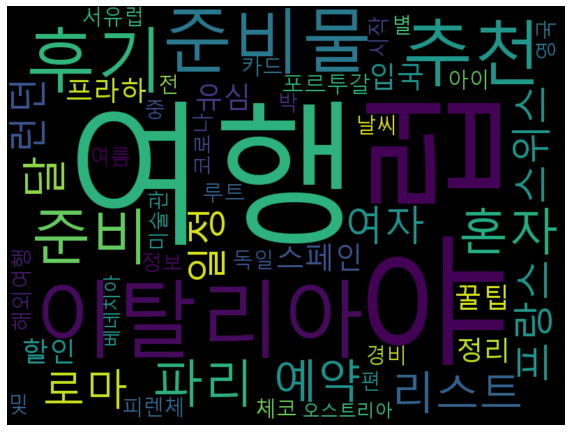

In [6]:
# 크롬 웹브라우저 실행
path = "C:/Users/Heochaebeom/PycharmProjects/BA_class/chromedriver"

driver = webdriver.Chrome(path)
url_list = []
title_list = []
noun_adj_list = []
content_list = ""
text = "유럽 여행"
# ------------------
png_name='result_nv'
# ------------------

okt = Okt()

for i in range(1, 51):  # 1~30페이지까지의 블로그 내용을 읽어옴
    url = 'https://section.blog.naver.com/Search/Post.nhn?pageNo=' + str(
        i) + '&rangeType=ALL&orderBy=sim&keyword=' + text
    # 네이버 블로그
    driver.get(url)
    time.sleep(0.5)

    for j in range(1, 8):  # 각 블로그 주소 저장

        # titles = driver.find_element_by_xpath(
        #     '/html/body/ui-view/div/main/div/div/section/div[2]/div[' + str(j) + ']/div/div[1]/div[1]/a[1]')
        titles = driver.find_element(By.XPATH,
                                     '/html/body/ui-view/div/main/div/div/section/div[2]/div[' + str(j) + ']/div/div[1]/div[1]/a[1]')
        #title = titles.get_attribute('href') # url주소
        # print(titles.text)
        title_list.append(titles.text)

    for data in title_list:
        sentences_tag = okt.pos(data)

        for word, tag in sentences_tag:
            if tag in ['Noun', 'Adjective']:
                noun_adj_list.append(word)
#             print('word: ', word)
#             print('tag: ', tag)

driver.quit()
counts = Counter(noun_adj_list)
tags = counts.most_common(50)


if platform.system() == 'Windows':
    path = r'c:\Windows\Fonts\malgun.ttf'
elif platform.system() == 'Darwin':  # Mac   OS
    path = r'/System/Library/Fonts/AppleGothic'
else:
    path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'

# print(title_list)
#             #url_list.append(title)
# print("------------------------------")
# print("url 수집 끝, 해당 url 데이터 크롤링")

wc = WordCloud(font_path=path, background_color='black', width=800, height=600, random_state=30)
print(dict(tags))
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud, interpolation="bilinear")
plt.show()

cloud.to_file(f'{png_name}.png')

# df = pd.DataFrame.from_dict([dict(tags)])
# print(df.T.reset_index())
# df_t_r=df.T.reset_index()
# print(df_t_r['index'])
# print(df_t_r.T)
# df_t_r.T.to_csv('nv_tour_e')

# ------------------------------------------------------------------------------------------------------------------------------

# '''
# for url in url_list:  # 수집한 url 만큼 반복
#     driver.get(url)  # 해당 url로 이동

#     driver.switch_to.frame('mainFrame')
#     overlays = ".se-component.se-text.se-l-default"  # 내용 크롤링
#     contents = driver.find_elements_by_css_selector(overlays)
#     contents = driver.findElements(By.cssSelector(overlays))


#     for content in contents:
#         content_list = content_list + content.text  # content_list 라는 값에 + 하면서 점점 누적
# '''
